c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warn

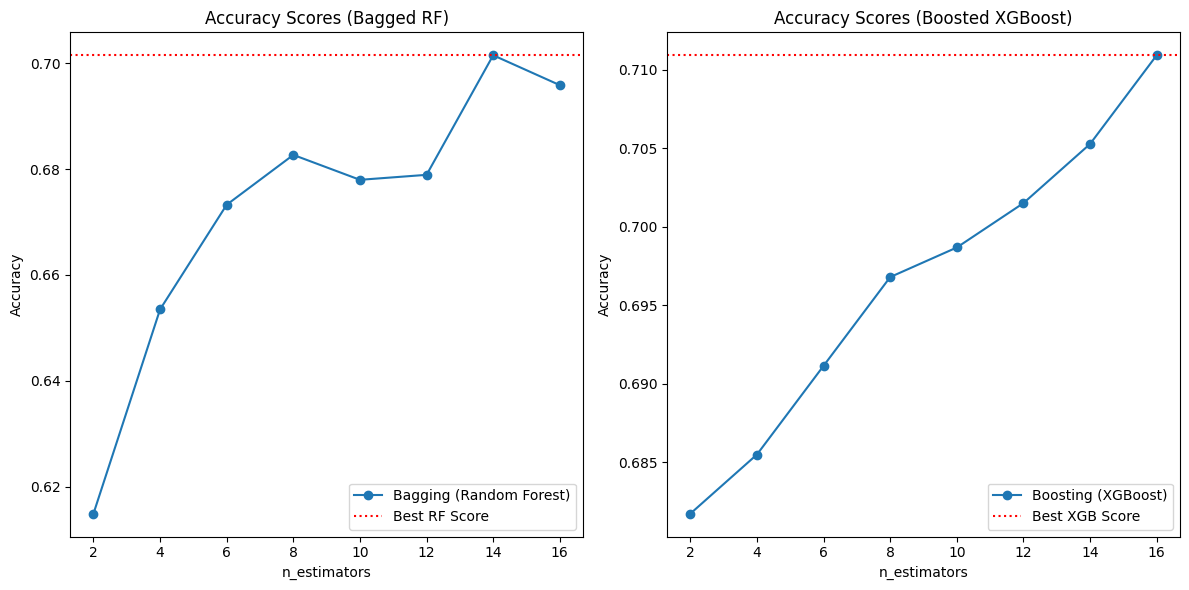

Best Random Forest Accuracy: 70.15%
Best XGBoost Accuracy: 71.09%


In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
import pandas as pd

# Load and preprocess the data
graduation_data = pd.read_csv('../../outputs/Assignment_3/final_selected_features_data.csv')
X = graduation_data.drop(columns=['Target'])
y = LabelEncoder().fit_transform(graduation_data['Target'])  # Encode the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize results dictionary
results = {}

# Bagging with Random Forest
n_estimators_range = range(2, 17, 2)
rf_accuracies = []

for n_estimators in n_estimators_range:
    random_forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=10,
        random_state=42
    )
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    rf_accuracies.append(metrics.accuracy_score(y_test, y_pred_rf))

# Boosting with XGBoost
xgb_accuracies = []
for n_estimators in n_estimators_range:
    xg_boost = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    xg_boost.fit(X_train, y_train)
    y_pred_xgb = xg_boost.predict(X_test)
    xgb_accuracies.append(metrics.accuracy_score(y_test, y_pred_xgb))

# Plotting results
plt.figure(figsize=(12, 6))

# Bagging plot
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, rf_accuracies, marker='o', label="Bagging (Random Forest)")
plt.axhline(y=max(rf_accuracies), color='r', linestyle='dotted', label='Best RF Score')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores (Bagged RF)")
plt.legend()

# Boosting plot
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, xgb_accuracies, marker='o', label="Boosting (XGBoost)")
plt.axhline(y=max(xgb_accuracies), color='r', linestyle='dotted', label='Best XGB Score')
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores (Boosted XGBoost)")
plt.legend()

plt.tight_layout()
plt.show()

# Print the best accuracies
print(f"Best Random Forest Accuracy: {max(rf_accuracies) * 100:.2f}%")
print(f"Best XGBoost Accuracy: {max(xgb_accuracies) * 100:.2f}%")
